# Criação da tabela "imoveis"

O primeiro passo para solucionar o case solicitado é carregar os dados do arquivo "train_houses 2.csv" para o postgreSQL. Então, a tabela "imoveis" foi criada por meio do comando sql abaixo: 

```sql
CREATE TABLE imoveis (
    No INT NOT NULL PRIMARY KEY,
    Type VARCHAR(255),
    Region VARCHAR(255),
    MunicipalityCode INT,
    Prefecture VARCHAR(255),
    Municipality VARCHAR(255),
    DistrictName VARCHAR(255),
    NearestStation VARCHAR(255),
    TimeToNearestStation VARCHAR(50),
    MinTimeToNearestStation INT,
    MaxTimeToNearestStation INT,
    FloorPlan VARCHAR(50),
    Area INT,
    AreaIsGreaterFlag INT,
    UnitPrice FLOAT,
    PricePerTsubo FLOAT,
    LandShape VARCHAR(50),
    Frontage FLOAT,
    FrontageIsGreaterFlag BOOLEAN,
    TotalFloorArea INT,
    TotalFloorAreaIsGreaterFlag INT,
    BuildingYear INT,
    PrewarBuilding INT,
    Structure VARCHAR(50),
    Use VARCHAR(50),
    Purpose VARCHAR(50),
    Direction VARCHAR(50),
    Classification VARCHAR(50),
    Breadth FLOAT,
    CityPlanning VARCHAR(255),
    CoverageRatio INT,
    FloorAreaRatio INT,
    Period VARCHAR(50),
    Year INT,
    Quarter INT,
    Renovation VARCHAR(50),
    Remarks TEXT,
    TradePrice BIGINT
);
```

# Resolvendo inconsistências no csv 'train_houses 2'

Algumas linhas do csv disponibilizado contém menos atributos, o que é um problema para a leitura e carregamento dos dados no banco. Além disso, muitas colunas possuem dados cujo tipo não condiz com o tipo pré-estabelecido.

In [1]:
import pandas as pd
import numpy as np

df_houses = pd.read_csv("train_houses 2.csv")
df_houses.head()

,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,MaxTimeToNearestStation,...,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,TradePrice
Pre-owned Condominiums,etc.,NaN,13103,Tokyo,Minato Ward,Kaigan,Takeshiba,1,1.0,1.0,...,NaN,Quasi-industrial Zone,60.0,400.0,1st quarter 2011,2011.0,1.0,Done,NaN,24000000.0
Residential Land(Land and Building),Residential Area,13120.0,Tokyo,Nerima Ward,Nishiki,Kamiitabashi,15,15.0,15.0,NaN,...,Category I Exclusively Low-story Residential Zone,60.0,200.0,3rd quarter 2013,2013,3.0,NaN,Dealings including private road,51000000,NaN
Residential Land(Land Only),Residential Area,13201.0,Tokyo,Hachioji City,Shimoongatamachi,Takao (Tokyo),1H-1H30,60.0,90.0,NaN,...,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2007,2007,4.0,NaN,NaN,14000000,NaN
Pre-owned Condominiums,etc.,NaN,13208,Tokyo,Chofu City,Kamiishiwara,Nishichofu,16,16.0,16.0,...,NaN,Quasi-industrial Zone,60.0,200.0,2nd quarter 2015,2015.0,2.0,Not yet,NaN,23000000.0
Residential Land(Land Only),Residential Area,13117.0,Tokyo,Kita Ward,Shimo,Shimo,6,6.0,6.0,NaN,...,Category I Exclusively Medium-high Residential...,60.0,200.0,4th quarter 2015,2015,4.0,NaN,NaN,33000000,NaN


In [2]:
# Define o número esperado de colunas
num_columns = 37
# Abre o arquivo e processa as linhas
with open('train_houses 2.csv', 'r', encoding='utf-8') as file:
    # Lê a primeira linha como cabeçalho
    header = file.readline().strip().split(',')
    # Lê as linhas restantes, apenas as que têm o número correto de colunas
    lines = [line.strip().split(',') for line in file if len(line.strip().split(',')) == num_columns]

df = pd.DataFrame(lines, columns=header)

In [3]:
df.head()

,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,MaxTimeToNearestStation,...,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,TradePrice
0,Residential Land(Land and Building),Residential Area,13120,Tokyo,Nerima Ward,Nishiki,Kamiitabashi,15,15.0,15.0,...,4.0,Category I Exclusively Low-story Residential Zone,60.0,200.0,3rd quarter 2013,2013,3,,Dealings including private road,51000000
1,Residential Land(Land Only),Residential Area,13201,Tokyo,Hachioji City,Shimoongatamachi,Takao (Tokyo),1H-1H30,60.0,90.0,...,4.5,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2007,2007,4,,,14000000
2,Residential Land(Land Only),Residential Area,13117,Tokyo,Kita Ward,Shimo,Shimo,6,6.0,6.0,...,4.5,Category I Exclusively Medium-high Residential...,60.0,200.0,4th quarter 2015,2015,4,,,33000000
3,Residential Land(Land and Building),Residential Area,13208,Tokyo,Chofu City,Kamiishiwara,Nishichofu,10,10.0,10.0,...,4.5,Category I Exclusively Low-story Residential Zone,40.0,80.0,1st quarter 2009,2009,1,,,42000000
4,Residential Land(Land and Building),Residential Area,13115,Tokyo,Suginami Ward,Shoan,Kugayama,14,14.0,14.0,...,4.0,Category II Exclusively Low-story Residential ...,60.0,150.0,1st quarter 2014,2014,1,,,53000000


In [4]:
df.dtypes

Type                           object
Region                         object
MunicipalityCode               object
Prefecture                     object
Municipality                   object
DistrictName                   object
NearestStation                 object
TimeToNearestStation           object
MinTimeToNearestStation        object
MaxTimeToNearestStation        object
FloorPlan                      object
Area                           object
AreaIsGreaterFlag              object
UnitPrice                      object
PricePerTsubo                  object
LandShape                      object
Frontage                       object
FrontageIsGreaterFlag          object
TotalFloorArea                 object
TotalFloorAreaIsGreaterFlag    object
BuildingYear                   object
PrewarBuilding                 object
Structure                      object
Use                            object
Purpose                        object
Direction                      object
Classificati

In [5]:
# Dicionário com os tipos esperados para cada coluna
tipos_esperados = {
    "Type": str,"Region": str,"MunicipalityCode": int,"Prefecture": str,"Municipality": str,
    "DistrictName": str,"NearestStation": str,"TimeToNearestStation": str,"MinTimeToNearestStation": int,
    "MaxTimeToNearestStation": int,"FloorPlan": str,"Area": int,"AreaIsGreaterFlag": int,"UnitPrice": float,
    "PricePerTsubo": float,"LandShape": str,"Frontage": float,"FrontageIsGreaterFlag": int,"TotalFloorArea": int,
    "TotalFloorAreaIsGreaterFlag": int,"BuildingYear": int,"PrewarBuilding": int,"Structure": str,"Use": str,"Purpose": str,
    "Direction": str,"Classification": str,"Breadth": float,"CityPlanning": str,"CoverageRatio": int,"FloorAreaRatio": int,
    "Period": str,"Year": int,"Quarter": int,"Renovation": str,"Remarks": str,"TradePrice": int
}

# Função para verificar e corrigir tipos
def corrigir_tipos(df, tipos_esperados):
    for coluna, tipo in tipos_esperados.items():
        if tipo == int:
            # Converte valores para int, valores inválidos se tornam NaN
            df[coluna] = pd.to_numeric(df[coluna], errors='coerce').astype('Int64')
        elif tipo == float:
            # Converte valores para float, valores inválidos se tornam NaN
            df[coluna] = pd.to_numeric(df[coluna], errors='coerce')
        elif tipo == str:
            # Verifica se o valor é string, caso contrário substitui por None
            df[coluna] = df[coluna].apply(lambda x: x if isinstance(x, str) else None)
    return df

df = corrigir_tipos(df, tipos_esperados)

# Reseta o índice e cria a coluna "No"
df.reset_index(drop=False, inplace=True)
df.rename(columns={'index': 'No'}, inplace=True)
df.columns = df.columns.str.lower()

In [6]:
df.to_csv('imoveis.csv', index=False)

In [7]:
df.head()

,no,type,region,municipalitycode,prefecture,municipality,districtname,neareststation,timetoneareststation,mintimetoneareststation,...,breadth,cityplanning,coverageratio,floorarearatio,period,year,quarter,renovation,remarks,tradeprice
0,0,Residential Land(Land and Building),Residential Area,13120,Tokyo,Nerima Ward,Nishiki,Kamiitabashi,15,15,...,4.0,Category I Exclusively Low-story Residential Zone,60,200,3rd quarter 2013,2013,3,,Dealings including private road,51000000
1,1,Residential Land(Land Only),Residential Area,13201,Tokyo,Hachioji City,Shimoongatamachi,Takao (Tokyo),1H-1H30,60,...,4.5,Category I Exclusively Low-story Residential Zone,40,80,4th quarter 2007,2007,4,,,14000000
2,2,Residential Land(Land Only),Residential Area,13117,Tokyo,Kita Ward,Shimo,Shimo,6,6,...,4.5,Category I Exclusively Medium-high Residential...,60,200,4th quarter 2015,2015,4,,,33000000
3,3,Residential Land(Land and Building),Residential Area,13208,Tokyo,Chofu City,Kamiishiwara,Nishichofu,10,10,...,4.5,Category I Exclusively Low-story Residential Zone,40,80,1st quarter 2009,2009,1,,,42000000
4,4,Residential Land(Land and Building),Residential Area,13115,Tokyo,Suginami Ward,Shoan,Kugayama,14,14,...,4.0,Category II Exclusively Low-story Residential ...,60,150,1st quarter 2014,2014,1,,,53000000


# Subindo o csv para o PostgreSQL

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# Leitura do CSV
df = pd.read_csv('imoveis.csv')

# Credenciais
username = 'postgres'
password = '1234'
hostname = 'localhost'
port = '5432'
database = 'postgres'

# Carregamento dos dados na tabela imoveis 
engine = create_engine(f'postgresql://{username}:{password}@{hostname}:{port}/{database}')
df.to_sql('imoveis', con=engine, index=False, if_exists='append')
engine.dispose()

# Leitura dos dados do PostgreSQL

In [9]:
import pandas as pd
from sqlalchemy import create_engine

# Credenciais de acesso
host = "localhost" 
port = "5432"  
database = "postgres"
user = "postgres"
password = "1234"

# Conexão com o banco
engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}")

# Carregando a tabela 'imoveis' para um DataFrame
try:
    df = pd.read_sql("SELECT * FROM imoveis", engine)
    print("Dados carregados com sucesso!")
except Exception as e:
    print("Erro ao carregar dados:", e)
finally:
    engine.dispose()

df.head()

Dados carregados com sucesso!


,no,type,region,municipalitycode,prefecture,municipality,districtname,neareststation,timetoneareststation,mintimetoneareststation,...,breadth,cityplanning,coverageratio,floorarearatio,period,year,quarter,renovation,remarks,tradeprice
0,0,Residential Land(Land and Building),Residential Area,13120,Tokyo,Nerima Ward,Nishiki,Kamiitabashi,15,15.0,...,4.0,Category I Exclusively Low-story Residential Zone,60.0,200.0,3rd quarter 2013,2013,3,None,Dealings including private road,51000000
1,1,Residential Land(Land Only),Residential Area,13201,Tokyo,Hachioji City,Shimoongatamachi,Takao (Tokyo),1H-1H30,60.0,...,4.5,Category I Exclusively Low-story Residential Zone,40.0,80.0,4th quarter 2007,2007,4,None,None,14000000
2,2,Residential Land(Land Only),Residential Area,13117,Tokyo,Kita Ward,Shimo,Shimo,6,6.0,...,4.5,Category I Exclusively Medium-high Residential...,60.0,200.0,4th quarter 2015,2015,4,None,None,33000000
3,3,Residential Land(Land and Building),Residential Area,13208,Tokyo,Chofu City,Kamiishiwara,Nishichofu,10,10.0,...,4.5,Category I Exclusively Low-story Residential Zone,40.0,80.0,1st quarter 2009,2009,1,None,None,42000000
4,4,Residential Land(Land and Building),Residential Area,13115,Tokyo,Suginami Ward,Shoan,Kugayama,14,14.0,...,4.0,Category II Exclusively Low-story Residential ...,60.0,150.0,1st quarter 2014,2014,1,None,None,53000000


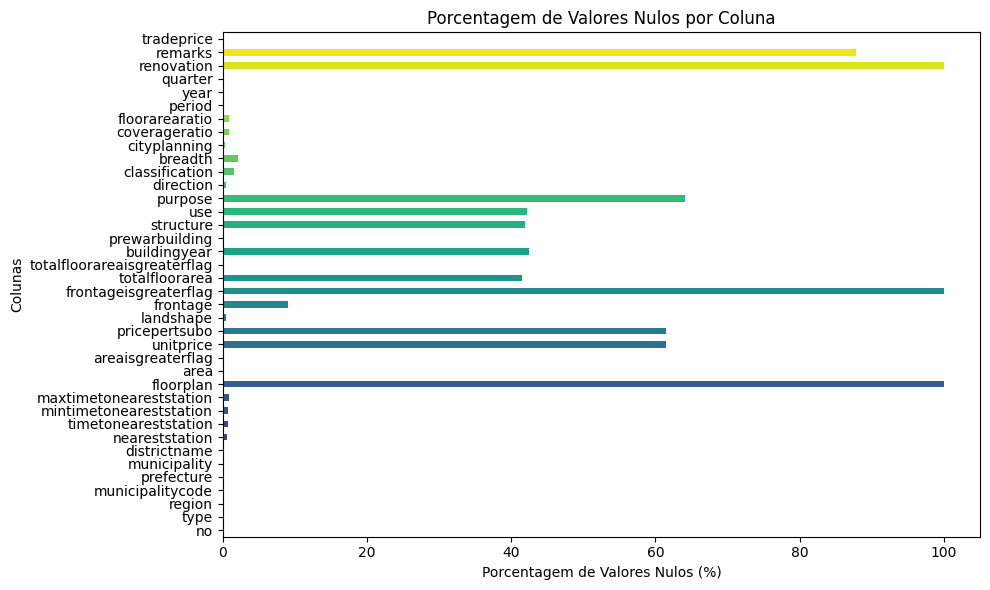

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculando a porcentagem de valores nulos para cada coluna
null_percentage = df.isnull().mean() * 100

# Gerando uma lista de cores diferentes para cada coluna
colors = plt.cm.viridis(np.linspace(0, 1, len(null_percentage)))

# Criando o gráfico de barras com features no eixo Y
plt.figure(figsize=(10, 6))
null_percentage.plot(kind='barh', color=colors)
plt.title('Porcentagem de Valores Nulos por Coluna')
plt.xlabel('Porcentagem de Valores Nulos (%)')
plt.ylabel('Colunas')
plt.tight_layout()
plt.show()

Colunas "renovation","frontageisgreaterflag" e "floorplan" possuem 100% de valores nulos.

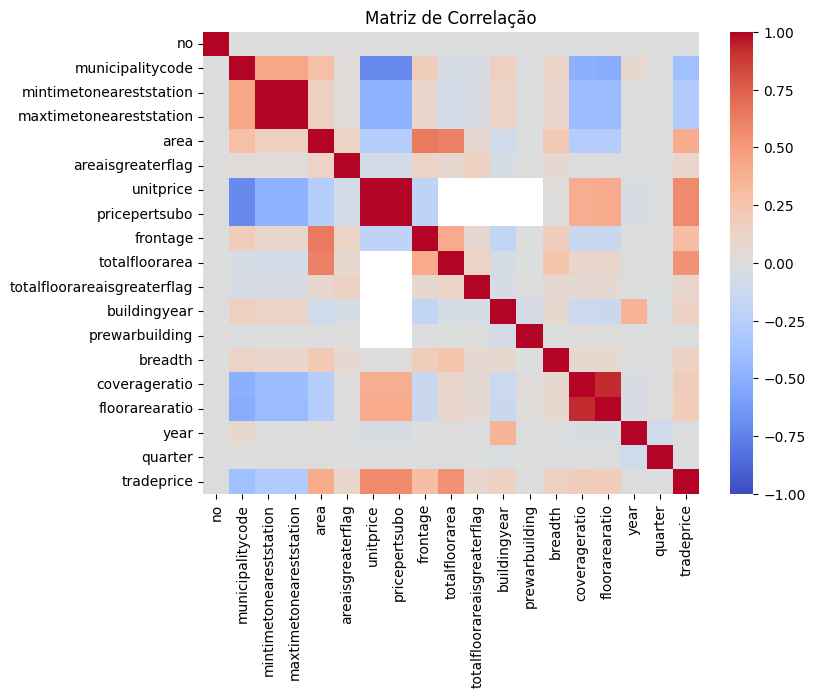

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação
correlation_matrix = df.corr(method ='spearman', numeric_only=True)

# Configurar o tamanho da figura
plt.figure(figsize=(8, 6))

# Gerar o mapa de calor
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

# Título e exibição do gráfico
plt.title('Matriz de Correlação')
plt.show()

Por meio da matriz de correlação pode-se obeservar alguns comportamentos, como a correlação positiva entre o atributo totalfloorarea e a variável target, o que faz sentido, já que um imóvel com maior "área de piso" tende a ser mais caro. Também se nota a correlação extremamente positiva entre as variáveis pricepertsubo e unitprice.

Abaixo é mostrada a distribuição da variável tradeprices.

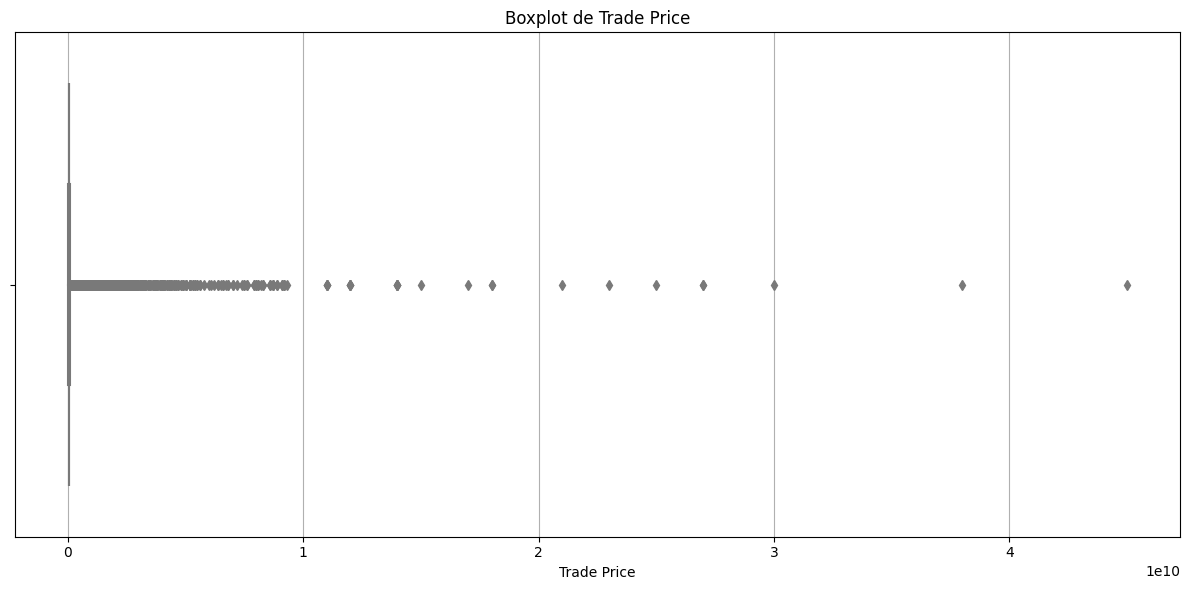

In [12]:
# Criar o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['tradeprice'], color='lightblue')
plt.title('Boxplot de Trade Price')
plt.xlabel('Trade Price')
plt.grid(axis='x')  
plt.tight_layout() 
plt.show()

In [13]:
import pandas as pd

pd.set_option('display.float_format', '{:.2f}'.format)

# Média, mediana, moda, maior valor, Q1 e Q3
media_train = df['tradeprice'].mean()
mediana_train = df['tradeprice'].median()
moda_train = df['tradeprice'].mode()[0]
maior_valor_train  = df['tradeprice'].max()
menor_valor_train  = df['tradeprice'].min()
q1_train  = df['tradeprice'].quantile(0.25)
q3_train  = df['tradeprice'].quantile(0.75)

# Intervalo interquartílico (IQR)
iqr_train  = q3_train  - q1_train 

# Limites do boxplot
limite_inferior_train  = q1_train  - 1.5 * iqr_train 
limite_superior_train  = q3_train  + 1.5 * iqr_train 

# Resultados
resultado = pd.DataFrame({
    'Estatística': ['Média', 'Mediana', 'Moda', 'Maior Valor', 'Menor Valor', 'Primeiro Quartil (Q1)', 'Terceiro Quartil (Q3)', 'Limite Inferior', 'Limite Superior'],
    'Valor': [media_train , mediana_train , moda_train , maior_valor_train, menor_valor_train, q1_train , q3_train , limite_inferior_train , limite_superior_train ]
})

print(resultado)

             Estatística          Valor
0                  Média    81213323.01
1                Mediana    43000000.00
2                   Moda    40000000.00
3            Maior Valor 45000000000.00
4            Menor Valor        1000.00
5  Primeiro Quartil (Q1)    30000000.00
6  Terceiro Quartil (Q3)    64000000.00
7        Limite Inferior   -21000000.00
8        Limite Superior   115000000.00


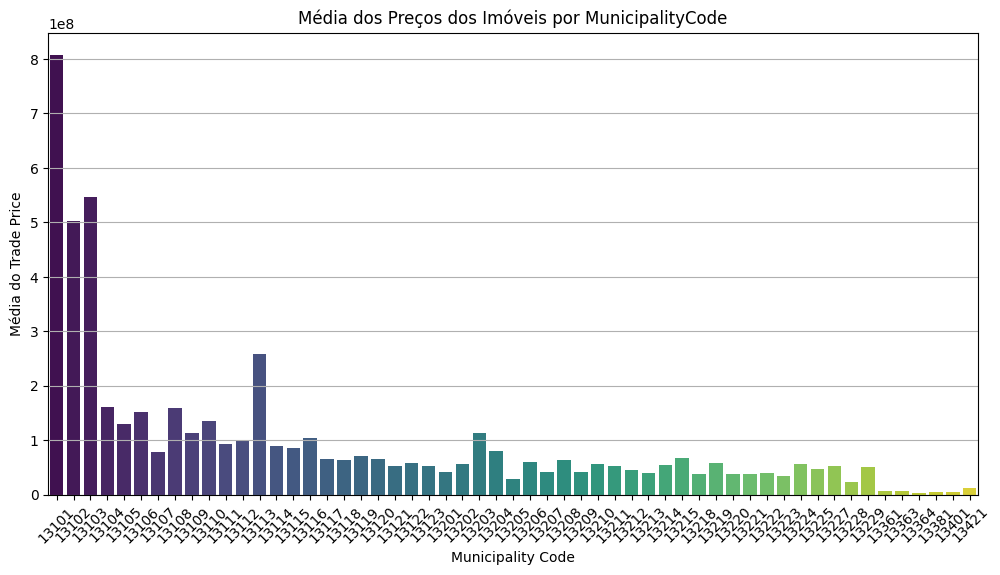

In [14]:
# Média dos preços dos imóveis por municipalitycode
media_precos = df.groupby('municipalitycode')['tradeprice'].mean().reset_index()
media_precos = media_precos.sort_values(by='tradeprice', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=media_precos, x='municipalitycode', y='tradeprice', palette='viridis')

plt.title('Média dos Preços dos Imóveis por MunicipalityCode')
plt.xlabel('Municipality Code')
plt.ylabel('Média do Trade Price')

# Mostrar o gráfico
plt.xticks(rotation=45)  
plt.grid(axis='y') 
plt.show()

# Substituição de outliers pelo limite superior

In [15]:
# df['tradeprice'] = df['tradeprice'].apply(lambda x: limite_superior_train if x > limite_superior_train else x)

# Treinamento do Modelo

In [16]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split

# Converte as colunas do tipo object para category
df = df.astype({col: 'category' for col in df.select_dtypes(include=['object']).columns})

# Variáveis independentes (X) / dependentes (y)
X = df.drop(['tradeprice','no', 'renovation','frontageisgreaterflag','floorplan','pricepertsubo', 'mintimetoneareststation', 'coverageratio'], axis=1)
y = df['tradeprice']

# Conjuntos de treinamento, validação e teste (70%,15%,15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

# Cria DMatrix para XGBoost
dtrain = xgb.DMatrix(X_train, label=np.log1p(y_train), enable_categorical = True)  
dval = xgb.DMatrix(X_val, label=np.log1p(y_val), enable_categorical = True)   

params = {
    'objective':'reg:squaredlogerror',
    'eval_metric': ['mape'],
    'learning_rate': 0.05,           
    'max_depth': 6,                                    
    'subsample': 0.8,                
    'colsample_bytree': 0.7,                  
    'verbosity': 2,
}

evals = [(dtrain, 'train'), (dval, 'val')]
results = {}
model = xgb.train(params, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=10, evals_result=results)


[0]	train-mape:0.95410	val-mape:0.95409
[1]	train-mape:0.95050	val-mape:0.95049
[2]	train-mape:0.94679	val-mape:0.94678
[3]	train-mape:0.94297	val-mape:0.94296
[4]	train-mape:0.93904	val-mape:0.93903
[5]	train-mape:0.93499	val-mape:0.93498
[6]	train-mape:0.93082	val-mape:0.93081
[7]	train-mape:0.92653	val-mape:0.92652
[8]	train-mape:0.92212	val-mape:0.92211
[9]	train-mape:0.91758	val-mape:0.91757
[10]	train-mape:0.91292	val-mape:0.91290
[11]	train-mape:0.90812	val-mape:0.90811
[12]	train-mape:0.90320	val-mape:0.90318
[13]	train-mape:0.89813	val-mape:0.89812
[14]	train-mape:0.89293	val-mape:0.89292
[15]	train-mape:0.88760	val-mape:0.88758
[16]	train-mape:0.88212	val-mape:0.88210
[17]	train-mape:0.87650	val-mape:0.87648
[18]	train-mape:0.87074	val-mape:0.87071
[19]	train-mape:0.86483	val-mape:0.86481
[20]	train-mape:0.85877	val-mape:0.85875
[21]	train-mape:0.85257	val-mape:0.85254
[22]	train-mape:0.84622	val-mape:0.84619
[23]	train-mape:0.83971	val-mape:0.83968
[24]	train-mape:0.83305	va

In [17]:
from sklearn.metrics import root_mean_squared_log_error, mean_absolute_percentage_error

# Predição no conjunto de validação
dval = xgb.DMatrix(X_val, enable_categorical=True)
y_pred_val_log = model.predict(dval)  

# Retornando para a escala real
y_pred_val = np.expm1(y_pred_val_log)

# RMSLE e MAPE no conjunto de validação
rmsle_val = root_mean_squared_log_error(y_val, y_pred_val)
mape_val = mean_absolute_percentage_error(y_val, y_pred_val)  


print(f'RMSLE no conjunto de validação: {rmsle_val}')
print("MAPE no conjunto de validação: {:.2f}%".format(mape_val*100))

RMSLE no conjunto de validação: 0.2582911596657394
MAPE no conjunto de validação: 17.05%


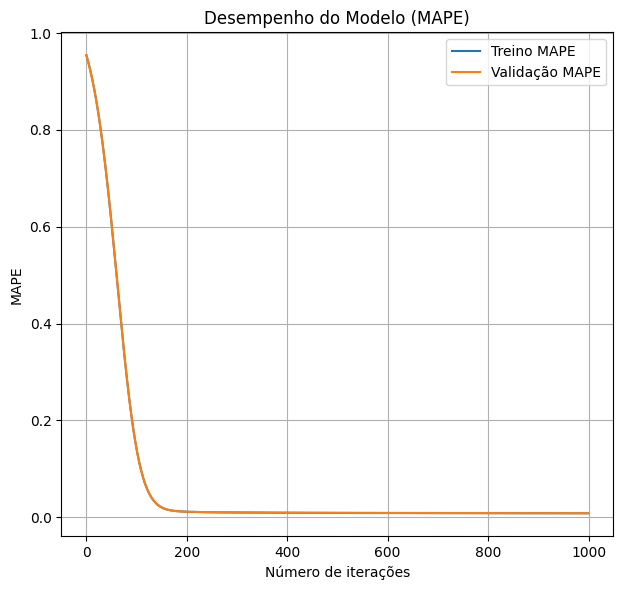

In [18]:
plt.figure(figsize=(12, 6))

# MAPE
plt.subplot(1, 2, 2)
plt.plot(results['train']['mape'], label='Treino MAPE')
plt.plot(results['val']['mape'], label='Validação MAPE')
plt.title('Desempenho do Modelo (MAPE)')
plt.xlabel('Número de iterações')
plt.ylabel('MAPE')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Desempenho no conjunto de teste

In [19]:
from sklearn.metrics import root_mean_squared_log_error, mean_absolute_percentage_error

# Predição no conjunto de teste
dtest = xgb.DMatrix(X_test, enable_categorical=True)
y_pred_test_log = model.predict(dtest)

# Retornando para a escala real
y_pred_test = np.expm1(y_pred_test_log)

# RMSLE e MAPE no conjunto de teste 
rmsle_test = root_mean_squared_log_error(y_test, y_pred_test) 
mape_test = mean_absolute_percentage_error(y_test, y_pred_test) 
  

print(f'RMSLE no conjunto de teste: {rmsle_test}')
print("MAPE no conjunto de teste: {:.2f}%".format(mape_test*100))

RMSLE no conjunto de teste: 0.2555191651211299
MAPE no conjunto de teste: 17.14%


# Inferência no conjunto de teste

In [20]:
df_test = pd.read_csv("test_houses 2.csv")
df_test.head()

,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,MaxTimeToNearestStation,...,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,TradePrice
Pre-owned Condominiums,etc.,NaN,13103,Tokyo,Minato Ward,Toranomon,Kamiyacho,4,4.00,4.00,...,NaN,Commercial Zone,80.00,500,3rd quarter 2016,2016.00,3.00,Not yet,NaN,NaN
Pre-owned Condominiums,etc.,NaN,13110,Tokyo,Meguro Ward,Higashiyama,Ikejiriohashi,7,7.00,7.00,...,NaN,Category I Residential Zone,60.00,300,3rd quarter 2012,2012.00,3.00,NaN,NaN,NaN
Pre-owned Condominiums,etc.,NaN,13112,Tokyo,Setagaya Ward,Kitakarasuyama,Chitosekarasuyama,25,25.00,25.00,...,NaN,Category I Exclusively Low-story Residential Zone,50.00,100,4th quarter 2015,2015.00,4.00,Done,NaN,NaN
Pre-owned Condominiums,etc.,NaN,13121,Tokyo,Adachi Ward,Ayase,Ayase,4,4.00,4.00,...,NaN,Commercial Zone,80.00,500,2nd quarter 2017,2017.00,2.00,Done,NaN,NaN
"Residential Land(Land and Building),Residential Area,13107,Tokyo,Sumida Ward,Honjo,Honjoazumabashi,7,7,7,,65,0,,,Semi-rectangular Shaped,6.2,False,170,0,1981,0,S,""House, Warehouse"",House,West,Ward Road,6,Neighborhood Commercial Zone,80,300,3rd quarter 2016,2016,3,,,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Define o número esperado de colunas
num_columns = 37
# Abre o arquivo e processa as linhas
with open('test_houses 2.csv', 'r', encoding='utf-8') as file:
    # Lê a primeira linha como cabeçalho
    header = file.readline().strip().split(',')
    # Lê as linhas restantes, apenas as que têm o número correto de colunas
    lines = [line.strip().split(',') for line in file if len(line.strip().split(',')) == num_columns]

df_teste = pd.DataFrame(lines, columns=header)

In [22]:
# Dicionário com os tipos esperados para cada coluna
tipos_esperados_test = tipos_esperados
tipos_esperados_test.popitem()

df_teste = corrigir_tipos(df_teste, tipos_esperados_test)

# Resetando o índice e criando a coluna "No"
df_teste = df_teste.drop(columns=['TradePrice', 'Renovation','FrontageIsGreaterFlag','FloorPlan','PricePerTsubo', 'MinTimeToNearestStation', 'CoverageRatio'])
df_teste.columns = df_teste.columns.str.lower()

In [23]:
df_teste

,type,region,municipalitycode,prefecture,municipality,districtname,neareststation,timetoneareststation,maxtimetoneareststation,area,...,purpose,direction,classification,breadth,cityplanning,floorarearatio,period,year,quarter,remarks
0,Residential Land(Land and Building),Residential Area,13214,Tokyo,Kokubunji City,Hiyoshicho,Kunitachi,12,12,95,...,,Northwest,City Road,4.00,Category I Exclusively Low-story Residential Zone,80,1st quarter 2010,2010,1,
1,Residential Land(Land and Building),Residential Area,13114,Tokyo,Nakano Ward,Yayoicho,Nakanofujimicho,8,8,220,...,House,South,Private Road,4.00,Neighborhood Commercial Zone,400,1st quarter 2019,2019,1,
2,Residential Land(Land Only),Residential Area,13123,Tokyo,Edogawa Ward,Shishibone,Shinozaki,16,16,70,...,,South,Ward Road,7.00,Category I Exclusively Medium-high Residential...,150,3rd quarter 2014,2014,3,
3,Residential Land(Land and Building),Residential Area,13119,Tokyo,Itabashi Ward,Mukaihara,Kotakemukaihara,7,7,70,...,,West,Ward Road,NaN,Category I Exclusively Medium-high Residential...,200,4th quarter 2011,2011,4,
4,Residential Land(Land and Building),Residential Area,13211,Tokyo,Kodaira City,Sakaecho,Ogawa (Tokyo),19,19,270,...,,North,City Road,12.00,Category I Exclusively Medium-high Residential...,200,4th quarter 2010,2010,4,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40883,Residential Land(Land Only),Commercial Area,13121,Tokyo,Adachi Ward,Shikahama,Daishimae,30-60minutes,60,230,...,,North,Ward Road,8.00,Neighborhood Commercial Zone,300,3rd quarter 2006,2006,3,
40884,Residential Land(Land Only),Residential Area,13114,Tokyo,Nakano Ward,Honcho,Shinnakano,6,6,80,...,House,East,Ward Road,4.00,Category I Exclusively Medium-high Residential...,200,4th quarter 2017,2017,4,
40885,Residential Land(Land and Building),Residential Area,13123,Tokyo,Edogawa Ward,Ichinoe,Funabori,21,21,90,...,House,Southeast,Road,4.00,Category I Exclusively Medium-high Residential...,100,1st quarter 2017,2017,1,
40886,Residential Land(Land Only),Residential Area,13112,Tokyo,Setagaya Ward,Akatsutsumi,Gotokuji,7,7,85,...,House,South,Ward Road,3.80,Category I Exclusively Low-story Residential Zone,100,2nd quarter 2015,2015,2,


In [24]:
df_teste = df_teste.astype({col: 'category' for col in df_teste.select_dtypes(include=['object']).columns})

# Cria a DMatrix 
dtest = xgb.DMatrix(df_teste, enable_categorical=True)

# Inferência no conjunto de teste
y_pred_log_test = model.predict(dtest)

# Transformação exponencial inversa
y_pred_all = np.expm1(y_pred_log_test)

# Adiciona a coluna de previsões ao DataFrame original
df_teste['tradeprice_prediction'] = y_pred_all

df_teste.reset_index(drop=False, inplace=True)
df_teste.rename(columns={'index': 'no'}, inplace=True)

In [25]:
df_teste.head()

,no,type,region,municipalitycode,prefecture,municipality,districtname,neareststation,timetoneareststation,maxtimetoneareststation,...,direction,classification,breadth,cityplanning,floorarearatio,period,year,quarter,remarks,tradeprice_prediction
0,0,Residential Land(Land and Building),Residential Area,13214,Tokyo,Kokubunji City,Hiyoshicho,Kunitachi,12,12,...,Northwest,City Road,4.00,Category I Exclusively Low-story Residential Zone,80,1st quarter 2010,2010,1,,33292436.00
1,1,Residential Land(Land and Building),Residential Area,13114,Tokyo,Nakano Ward,Yayoicho,Nakanofujimicho,8,8,...,South,Private Road,4.00,Neighborhood Commercial Zone,400,1st quarter 2019,2019,1,,272516096.00
2,2,Residential Land(Land Only),Residential Area,13123,Tokyo,Edogawa Ward,Shishibone,Shinozaki,16,16,...,South,Ward Road,7.00,Category I Exclusively Medium-high Residential...,150,3rd quarter 2014,2014,3,,17805580.00
3,3,Residential Land(Land and Building),Residential Area,13119,Tokyo,Itabashi Ward,Mukaihara,Kotakemukaihara,7,7,...,West,Ward Road,NaN,Category I Exclusively Medium-high Residential...,200,4th quarter 2011,2011,4,,43964296.00
4,4,Residential Land(Land and Building),Residential Area,13211,Tokyo,Kodaira City,Sakaecho,Ogawa (Tokyo),19,19,...,North,City Road,12.00,Category I Exclusively Medium-high Residential...,200,4th quarter 2010,2010,4,,63454620.00


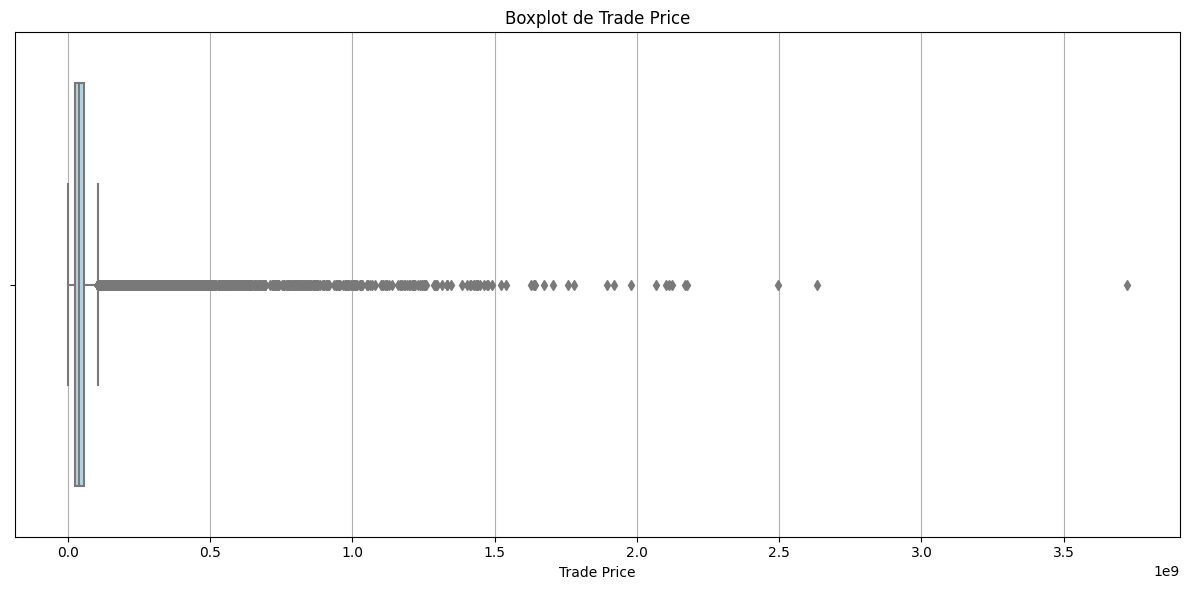

In [26]:
# Cria o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_teste['tradeprice_prediction'], color='lightblue')
plt.title('Boxplot de Trade Price')
plt.xlabel('Trade Price')
plt.grid(axis='x')
plt.tight_layout() 
plt.show()

In [27]:
import pandas as pd

pd.set_option('display.float_format', '{:.2f}'.format)

# Média, mediana, moda, maior valor, Q1 e Q3
media_teste = df_teste['tradeprice_prediction'].mean()
mediana_teste  = df_teste['tradeprice_prediction'].median()
moda_teste  = df_teste['tradeprice_prediction'].mode()[0]
maior_valor_teste  = df_teste['tradeprice_prediction'].max()
menor_valor_teste = df['tradeprice'].min()
q1_teste  = df_teste['tradeprice_prediction'].quantile(0.25)
q3_teste  = df_teste['tradeprice_prediction'].quantile(0.75)

# Intervalo interquartílico (IQR)
iqr_teste  = q3_teste  - q1_teste 

# Limites do boxplot
limite_inferior_teste  = q1_teste  - 1.5 * iqr_teste 
limite_superior_teste  = q3_teste  + 1.5 * iqr_teste 

# Comparação entre os resultados em cada conjunto
resultado_comparacao = pd.DataFrame({
    'Estatística': ['Média', 'Mediana', 'Moda', 'Maior Valor', 'Menor Valor', 'Primeiro Quartil (Q1)', 'Terceiro Quartil (Q3)', 'Limite Inferior', 'Limite Superior'],
    'Treinamento': [media_train, mediana_train, moda_train, maior_valor_train, menor_valor_train, q1_train, q3_train, limite_inferior_train, limite_superior_train],
    'Teste': [media_teste, mediana_teste, moda_teste, maior_valor_teste, menor_valor_teste, q1_teste, q3_teste, limite_inferior_teste, limite_superior_teste]
})

print(resultado_comparacao)

             Estatística    Treinamento         Teste
0                  Média    81213323.01   59711444.00
1                Mediana    43000000.00   39966016.00
2                   Moda    40000000.00   21943764.00
3            Maior Valor 45000000000.00 3722525696.00
4            Menor Valor        1000.00       1000.00
5  Primeiro Quartil (Q1)    30000000.00   25740193.00
6  Terceiro Quartil (Q3)    64000000.00   57675372.00
7        Limite Inferior   -21000000.00  -22162575.50
8        Limite Superior   115000000.00  105578140.50


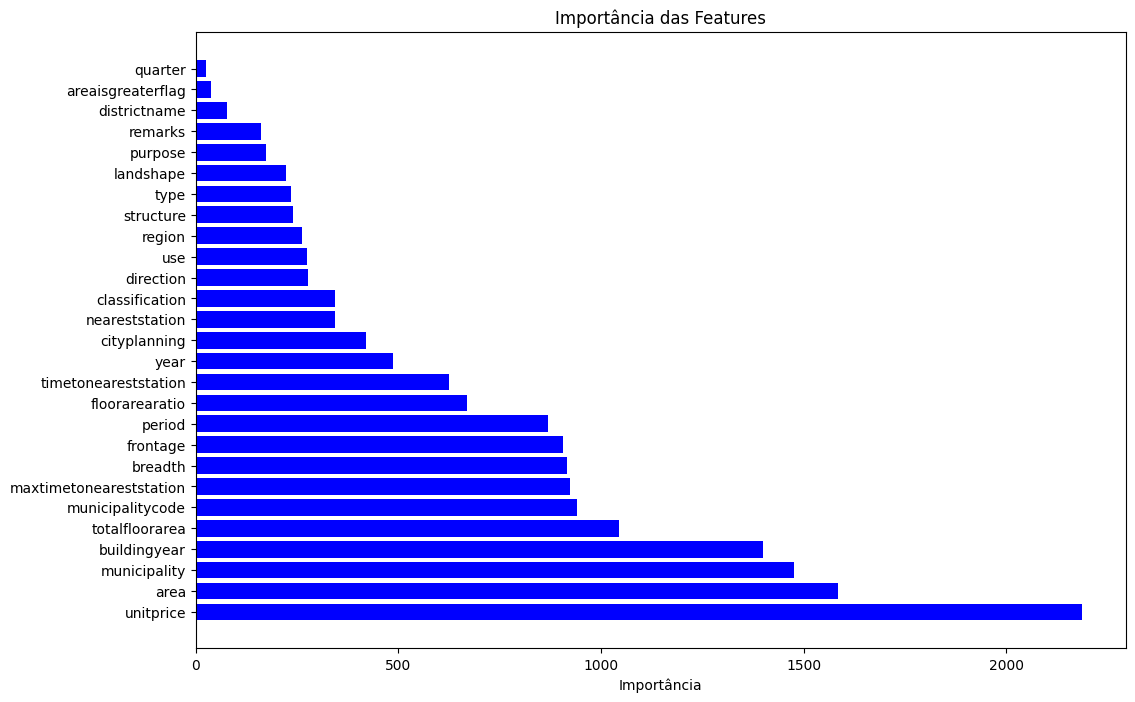

In [28]:
# Feature importance
importance = model.get_score(importance_type='weight') 
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Importância')
plt.title('Importância das Features')
plt.show()

In [29]:
df_teste.to_csv('output.csv')